# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [191]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [192]:
#Read in data from source 
df_raw = pd.read_csv("https://raw.githubusercontent.com/ga-students/SF-DAT-20/master/HW%20assignments/HW2/admissions.csv")
print df_raw.head()

   admit  gre   gpa  prestige
0      0  380  3.61         3
1      1  660  3.67         3
2      1  800  4.00         1
3      1  640  3.19         4
4      0  520  2.93         4


## Questions
#### Question 1. How many observations are in our dataset? 


In [193]:
df_raw.shape

(400, 4)

Answer: 400

#### Question 2. Create a summary table

In [194]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


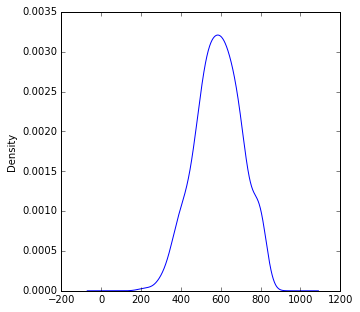

In [195]:
df_raw.gre.plot(kind="density",
              figsize=(5,5))   #plot density functions



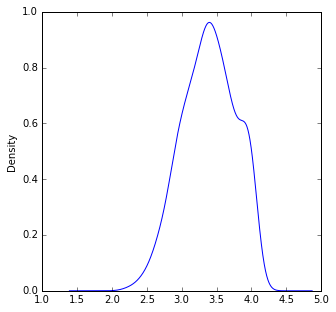

In [196]:
df_raw.gpa.plot(kind="density",
              figsize=(5,5))   #plot density functions



#### Question 3. Why would GRE have a larger STD than GPA?

Answer: The STD for GRE is larger than that of the GPA because of scale -- that is, the values for GRE are much larger than those for the GPA.  The average GRE score is 598 while the GPA mean score is 3.39.  The range for the GRE score values is 220 to 800. The range for the GPA scores is 2.26 to 4.

#### Question 4. Drop data points with missing data


In [197]:
mi=df_raw[df_raw.isnull().any(axis=1)]
print mi
print
df=df_raw.dropna()
print df_raw.count()
print
print df.count()
df[df.isnull().any(axis=1)]


     admit  gre   gpa  prestige
187      0  NaN   NaN         2
212      0  NaN  2.87         2
236      1  660   NaN       NaN

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

admit       397
gre         397
gpa         397
prestige    397
dtype: int64


,admit,gre,gpa,prestige


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: Depending on the method, you may need to do more or less checking. In this case, using dropna() is good so just count() is a useful check.

I used dropna as recommended.  First I looked at the observations where the missings were present.  Then, I created a new data set called df where the missing rows were dropped.  I checked the counts from df_raw and from the new data set df to make sure that my raw dataset was untouched and that my new dataset had lost the correct number of rows to account for the missings.  Lastly, I checked df for any nulls.  There are none.

From here on I will be working with dataset df.


#### Question 6. Create box plots for GRE and GPA

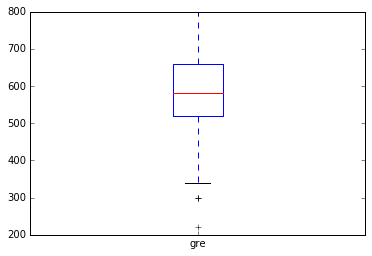

In [198]:
df.gre.plot(kind = 'box')

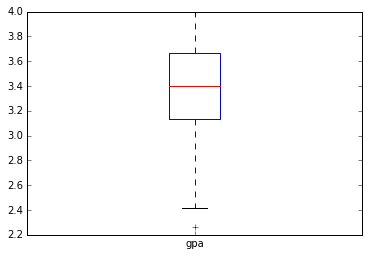

In [199]:
df.gpa.plot(kind = 'box')

#### Question 7. What do this plots show?

Answer: The box plots show us   
1) There are outliers in both feature sets.  GPA has observations at one value and GRE has observations at two values.  
2) All outliers are below the mean 
3) The GPA distribution looks symmetric
4) The GRE distribution has a positive skew, it is skewed to the right.  The median and mean expressed in the describe display for this variable confirm this because the mean is greater than the median.

#### Question 8.  If our model had an assumption of a symmetric distribution would we meet that requirement? 

Answer: We would be correct for the GPA and to be perfectly symmetric we would need to make some adjustments to the GRE dataset.

#### Question 9. Which of our variables are potentially colinear? 

In [200]:
# create a correlation matrix for the data
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 10. What did you find?

Answer to 9: The two variables GRE and GPA are colinear since their correlation coefficient is .38, higher than any other correlations between any othe variables in the dataset.  

Answer to 10: The correlation matrix we see confirms our intuition about how the variables would affect admissions, that is, school rankings from highest = 1 to lowest=4 are negatively correlated with admissions, and higher GPA and GRE scores are positively correlated with admission.  We can see also that GPA and GRE scores are correlated affirming the belief that good grades and good test scores go together.  Whether that is due to raw talent or good study habits (or both) is beyond the scope of the information in this dataset. Again, the performance scores are negatively correlated with school prestige.  This is an important table to show our children.

## Bonus/Advanced

/Users/karla/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/karla/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/karla/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/karla/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set o

GRE: 310.0 870.0

GPA: 2.32 4.48
GRE outliers
     admit  gre   gpa  prestige
71       0  300  2.92         4
179      0  300  3.01         3
304      0  220  2.83         3
315      1  300  2.84         2

GPA outliers
     admit  gre   gpa  prestige
289      0  420  2.26         4

Dataset without outliers
            admit         gre         gpa    prestige
count  392.000000  392.000000  392.000000  392.000000
mean     0.318878  591.428571    3.400153    2.479592
std      0.466637  111.781665    0.374877    0.945898
min      0.000000  340.000000    2.420000    1.000000
25%      0.000000  520.000000    3.140000    2.000000
50%      0.000000  590.000000    3.400000    2.000000
75%      1.000000  680.000000    3.670000    3.000000
max      1.000000  800.000000    4.000000    4.000000

New Correlations
             admit       gre       gpa  prestige
admit     1.000000  0.181976  0.172239 -0.237270
gre       0.181976  1.000000  0.357025 -0.109055
gpa       0.172239  0.357025  1.000000 

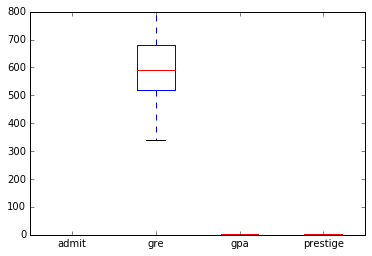

In [201]:
#### 1. Bonus: Get rid of outliers in your dataset
iqr=df.gre.quantile(.75) - df.gre.quantile(.25)
gre_bfence = df.gre.quantile(.25)-iqr*1.5
gre_tfence = df.gre.quantile(.75)+iqr*1.5
print 'GRE:', gre_bfence , gre_tfence
print
iqr=df.gpa.quantile(.75) - df.gpa.quantile(.25)
gpa_bfence = df.gpa.quantile(.25)-iqr*1.5
gpa_tfence = df.gpa.quantile(.75)+iqr*1.5
print 'GPA:', gpa_bfence, gpa_tfence

print 'GRE outliers'
print df[df.gre < gre_bfence]
print 
print 'GPA outliers'
print  df[df.gpa < gpa_bfence]
df.drop(df[df.gre > gre_tfence].index, inplace = True) 
df.drop(df[df.gre < gre_bfence].index, inplace = True) 
df.drop(df[df.gpa > gpa_tfence].index, inplace = True) 
df.drop(df[df.gpa < gpa_bfence].index, inplace = True) 
print 
print 'Dataset without outliers'
print df.describe()
print 
print 'New Correlations'
print df.corr()

df.plot(kind = 'box')



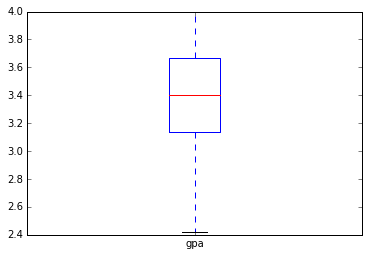

In [202]:
df.gpa.plot(kind='box')

#### 2. Bonus: Add dummy variables for GRE scores. Top 10% are considered very high. next 25% of GPA scores are considered high, medium 50% are considered medium and lowers 25% are considered Low. 

#I see the correction on Slack and so the low category will be changed to bottom 15%, not 25%.

In [203]:
df['gre_medium']   = [1 if el >= df.gre.quantile(.15) and el<df.gre.quantile(.65) else 0 for el in df.gre]
df['gre_high']     = [1 if el >= df.gre.quantile(.65) and el<df.gre.quantile(.90) else 0 for el in df.gre]
df['gre_veryhigh'] = [1 if el >= df.gre.quantile(.90) else 0 for el in df.gre]
df.describe()

/Users/karla/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/karla/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/karla/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

,admit,gre,gpa,prestige,gre_medium,gre_high,gre_veryhigh
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,0.318878,591.428571,3.400153,2.479592,0.492347,0.247449,0.117347
std,0.466637,111.781665,0.374877,0.945898,0.500580,0.432081,0.322245
min,0.000000,340.000000,2.420000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,520.000000,3.140000,2.000000,0.000000,0.000000,0.000000
50%,0.000000,590.000000,3.400000,2.000000,0.000000,0.000000,0.000000
75%,1.000000,680.000000,3.670000,3.000000,1.000000,0.000000,0.000000
max,1.000000,800.000000,4.000000,4.000000,1.000000,1.000000,1.000000


Michael: I don't like the big pink error blocks and I am trying to understand what Python is suggesting in terms of alternatives.  The code is working as is so the error messages are warnings in this case.  I would like to learn how to use Python correctly in these cases and would appreciate your guidance on how to revise the statements that are causing the warnings.